# 重みの初期化に関する話題。
- 隠れ層のアクティベーション分布
- ReLUの場合の重み値の初期化(Ｈｅの初期値),sigmoidを使う場合のXavierの初期値

In [1]:
#最初のお約束の設定
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
#import common.gradient as g #例えば、本書の共通ライブラリを読み込む場合の設定
import numpy as np
import matplotlib.pyplot as plt  #pylabから色々と呼び出してしまうと、本来のモジュールがわからないまま使用することとなり、かえって混乱してしまうため、pylabは使わないことを強く推奨します。
######################################################

In [2]:
#sigmoid関数などの読み込み。
from common.functions import sigmoid #sigmoid関数の読み込み。
# Notebook出力には次の１行が必要（%matplotlib inlineだとグラフを回転できない）
%matplotlib notebook

In [3]:
#ヒストグラム描画の試行。後で再利用しやすいように、関数化しておく。
def trial(parameter, init_weight_function):
    x = np.random.randn(1000, 100) # 1000個のデータ(100ピクセルの画像が1000枚のイメージ)

    node_num          = 100 #各隠れ層のノード（ニューロン）の数
    hidden_layer_size = 5   #隠れ層が5個
    activations       = {}  #ここにアクティベーションの結果を格納する

    #sigmoid関数を伝搬させていく
    for i in range(hidden_layer_size):
        if i != 0:
            x = activations[i-1]

        w = init_weight_function(node_num, parameter) #(node_num, node_num)の行列を生成して重みとする

        z = np.dot(x, w)
        a = sigmoid(z)
        print("== print shape of a[%d] = %s" % (i, a.shape))

        activations[i] = a

    #各層のsigmoid関数の処理結果、すなわちアクティベーションの様子を描画する
    for i,a in activations.items():
        #１つの描画キャンパスに複数のグラフを描画するため、subplotを利用する
        #https://stats.biopapyrus.jp/python/subplot.html
        #subplot を使うには、3 つの引数を渡す必要があり、subplot(2, 2, 1) のように利用する（省略して subplot(221) としても可）。
        #最初の 2 つの引数は、分割数を表す。描画キャンパスを何行に分割するのかを 1 番目の引数で指定し、
        #何列に分割するのかを 2 番目の引数で指定する。3 番目の引数に、これからグラフを描くのに利用するサブ領域の番号を入れる。
        #例えば、描画キャンパスを 4 分割してあれば、サブ領域の番号は 1, 2, 3, 4 と決められている。
        #基本的に、上から下、左から右の順位で、領域の番号がつけられる。
        plt.subplot(1 , len(activations), i+1)

        plt.title(str(i+1) + "-layer")

        #第一引数は生データ
        #第２引数は、棒の数
        #第３引数：ビンの最小値と最大値を指定。(デフォルト値: (x.min(), x.max()))
        plt.hist(a.flatten(), 30, range=(0,1))


    #グラフの大きさを調整(幅、高さを持つ、リストもしくはタプルを与える)
    #plt.figure(figsize=[10,10])
    plt.figure() #figureを呼び出すことで、別々のグラフに描画する。
    #plt.show()
    
#重みの初期化パターンを関数化したもの
def init_weight1(node_num, parameter):
    return np.random.randn(node_num, node_num) * parameter #(node_num, node_num)の行列を生成して重みとする

#重みの初期化パターンを関数化したもの
def init_weight2(node_num, parameter):
    return np.random.randn(node_num, node_num) * np.sqrt(parameter / node_num) #(node_num, node_num)の行列を生成して重みとする    

== print shape of a[0] = (1000, 100)
== print shape of a[1] = (1000, 100)
== print shape of a[2] = (1000, 100)
== print shape of a[3] = (1000, 100)
== print shape of a[4] = (1000, 100)


<IPython.core.display.Javascript object>


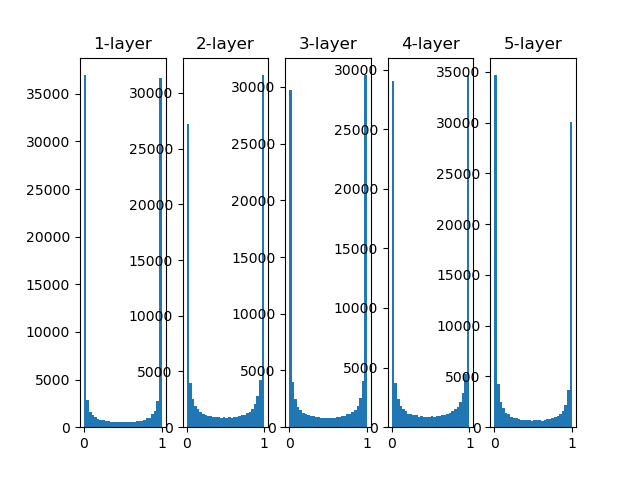

<IPython.core.display.Javascript object>


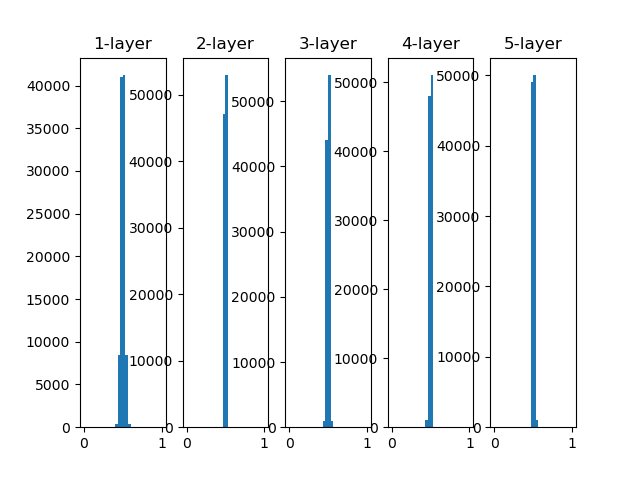

In [4]:
#実際に試してみる。
trial(1.0, init_weight1)

このグラフ(figure1)は、各層の出力(1000,100)行列をflattenしてヒストグラムで表示している。行列の各要素がどういった値を持つかの頻度がこれで一目瞭然だ。これを見ると、0と1を示す要素数が多いことがわかり、重みの各要素が0または1に偏っていることがわかる。すなわち、ニューラルネットワークでは表現度として微分が必要なのだが、この状況だと微分の結果が０になってしまい、表現力が無いネットワークになることがわかる。

では、parameterを0.01にしてみる。

== print shape of a[0] = (1000, 100)
== print shape of a[1] = (1000, 100)
== print shape of a[2] = (1000, 100)
== print shape of a[3] = (1000, 100)
== print shape of a[4] = (1000, 100)


<IPython.core.display.Javascript object>


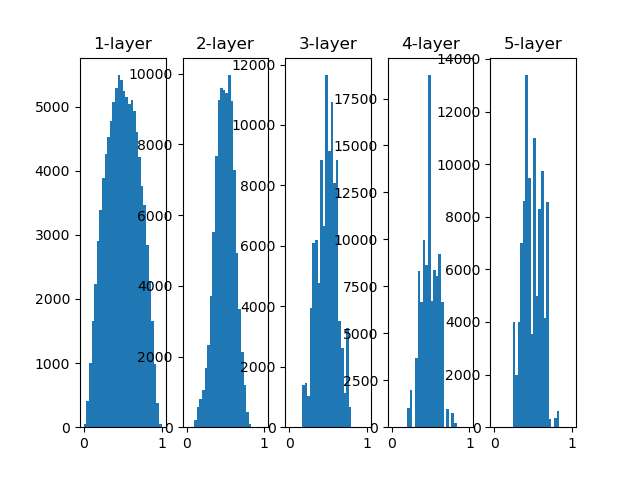

In [5]:
#実際に試してみる。
trial(0.01, init_weight1)

figure2では今度は0,1に値が集中しなくなり、傾きも出るようになってきたとおもう（ネットワークの表現力が増した）

次に、各重みをノード数の√の逆数で割ってみる。すると、figure3ではうまい分布になってきた。これをXavierの初期値というらしい。

== print shape of a[0] = (1000, 100)
== print shape of a[1] = (1000, 100)
== print shape of a[2] = (1000, 100)
== print shape of a[3] = (1000, 100)
== print shape of a[4] = (1000, 100)


<IPython.core.display.Javascript object>


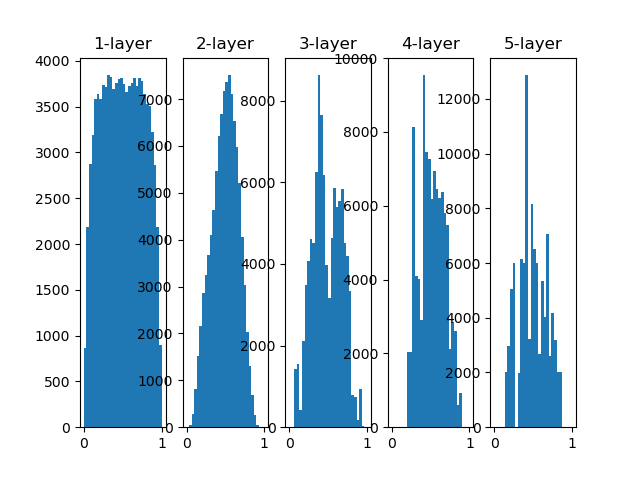

In [6]:
#実際に試してみる。
trial(1.0, init_weight2)

== print shape of a[0] = (1000, 100)
== print shape of a[1] = (1000, 100)
== print shape of a[2] = (1000, 100)
== print shape of a[3] = (1000, 100)
== print shape of a[4] = (1000, 100)


<IPython.core.display.Javascript object>


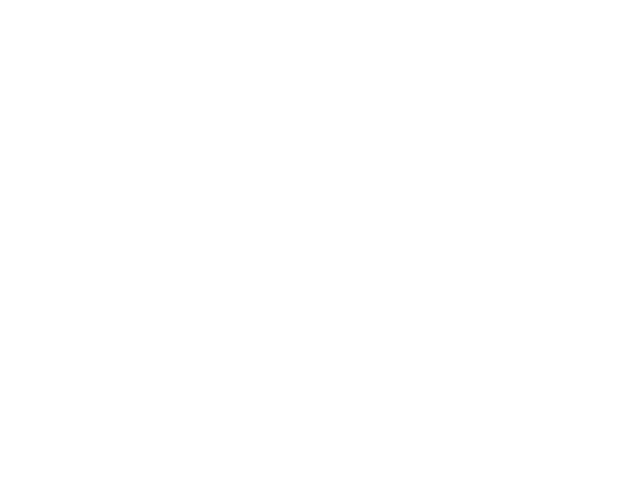

In [7]:
#パラメータを少し変えて実際に試してみる。
trial(2.0, init_weight2)

figure4では最初の重みが少しグラフの形が変わっている。広がりのある感じになっている。これをReLUの場合に特化したHeの初期値と呼ぶ。